# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [1]:
import nibabel as nib

# Replace 'your_image_name.nii.gz' with the actual name of the file you dragged in
img = nib.load('CT_AVM.nii.gz')

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [3]:
file_path = 'CT_AVM.nii.gz'
img = nib.load(file_path)
mri = img.get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

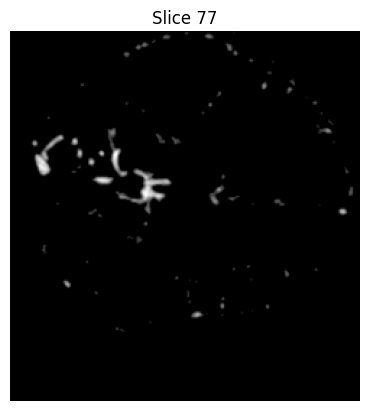

In [6]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [7]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

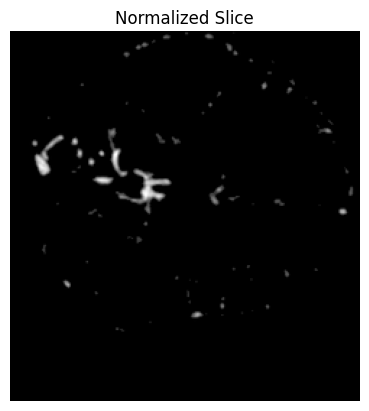

In [8]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

2025-12-22 07:24:09.321319: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-22 07:24:10.952219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-22 07:24:13.789359: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
2025-12-22 07:24:14.204822: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (3

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

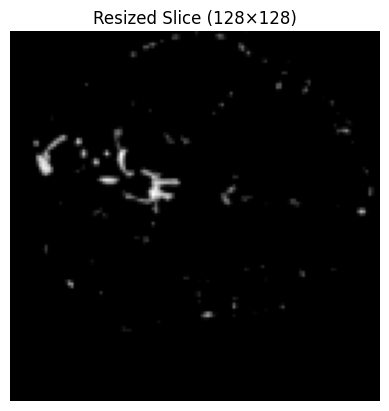

In [9]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [10]:
img2 = nib.load('/workspaces/Brain_Tumor_Segmentation_BCP/Week_2/Python_libraries/Nibabel/MR_Gd.nii.gz')

In [11]:

mri = img2.get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (176, 188, 144)


In [13]:
slice_index1 = mri.shape[2] // 3
slice_index2 = mri.shape[2] // 4
slice_index3 = mri.shape[2] // 6
slice_index4 = mri.shape[2] // 5
slice_index5 = mri.shape[2] // 7

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

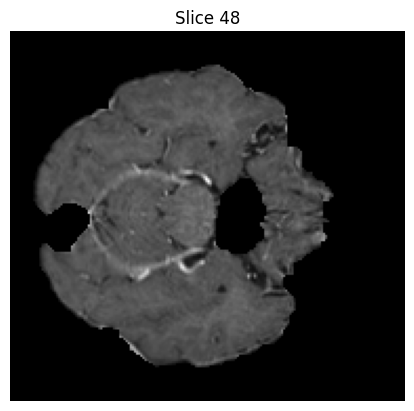

In [16]:
plt.imshow(mri[:, :, slice_index1], cmap='gray')
plt.title(f'Slice {slice_index1}')
plt.axis('off')


(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

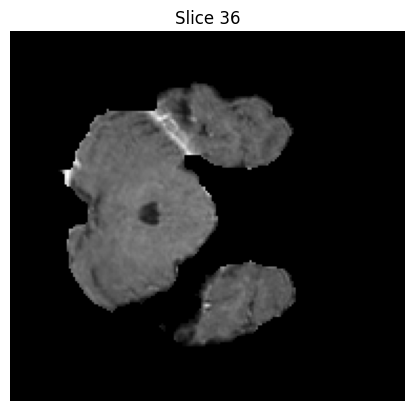

In [17]:
plt.imshow(mri[:, :, slice_index2], cmap='gray')
plt.title(f'Slice {slice_index2}')
plt.axis('off')

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

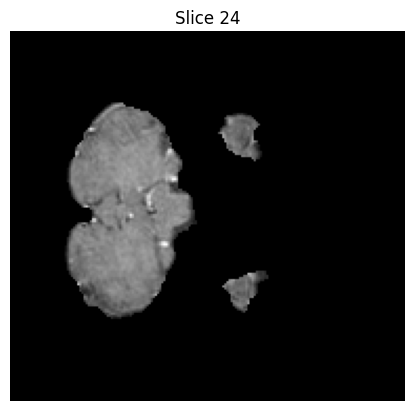

In [20]:
plt.imshow(mri[:, :, slice_index3], cmap='gray')
plt.title(f'Slice {slice_index3}')
plt.axis('off')

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

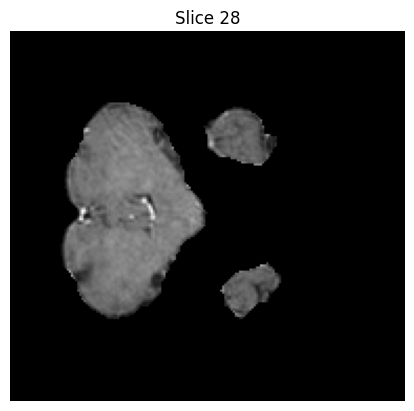

In [21]:
plt.imshow(mri[:, :, slice_index4], cmap='gray')
plt.title(f'Slice {slice_index4}')
plt.axis('off')

(np.float64(-0.5), np.float64(187.5), np.float64(175.5), np.float64(-0.5))

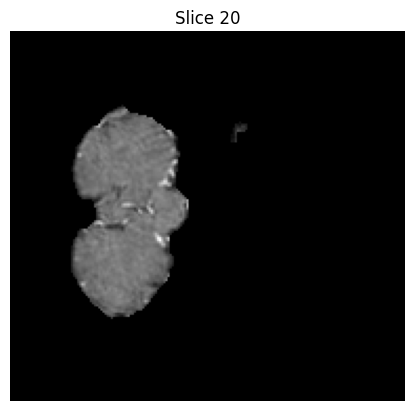

In [22]:
plt.imshow(mri[:, :, slice_index5], cmap='gray')
plt.title(f'Slice {slice_index5}')
plt.axis('off')

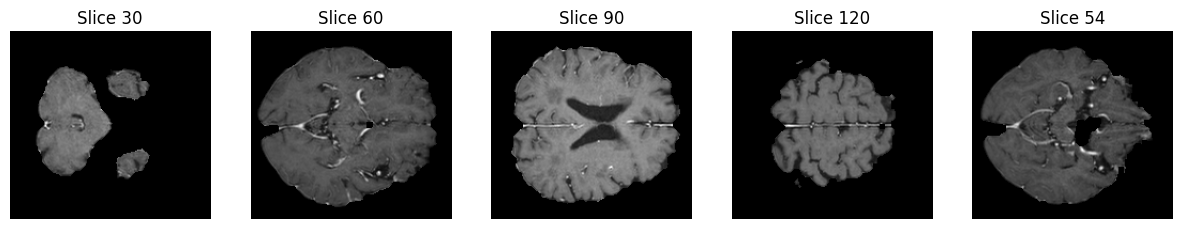

In [24]:


def plot_slices(volume, indices):


    n = len(indices)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    
    if n == 1:
        axes = [axes]

    for i, slice_idx in enumerate(indices):
        slice_data = volume[:, :, slice_idx]
        
    
        axes[i].imshow(slice_data, cmap='gray')
        axes[i].set_title(f"Slice {slice_idx}")
        axes[i].axis('off') 
        
    plt.show()

data = img2.get_fdata()


plot_slices(data, [30, 60, 90, 120, 54])

In [25]:


def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)

    if max_val - min_val == 0:
        return volume

    normalized_volume = (volume - min_val) / (max_val - min_val)
    return normalized_volume

raw_data = img2.get_fdata()
norm_data = normalize_volume(raw_data)

print(np.min(norm_data), np.max(norm_data))

0.0 1.0
